In [582]:
import pandas as pd

In [583]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [584]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [585]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Data Cleaning

1. Which features are categorical and which are numerical?
2. Available Data Types?
3. None, blank or empty values?

---

### Which features are categorical and which are numerical?

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [587]:
print("Categorical variables")
categorical_variables = df.select_dtypes(include=["object"]).columns
for col in categorical_variables: # returns all the categorical columns
    print(col)

Categorical variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [588]:
print("Numerical variables")
numerical_variables = df.select_dtypes(include=["float64"]).columns
for col in numerical_variables:
    print(col)

Numerical variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [589]:
for col in df.columns:
    print(f"{col}, {df[col].isnull().sum()} --- {df[col].isnull().sum() / len(df)}%") # retursn all the NaN rows sum for each column
print("Total length of the dataset", len(df))

PassengerId, 0 --- 0.0%
HomePlanet, 201 --- 0.023122052225928908%
CryoSleep, 217 --- 0.02496261359714713%
Cabin, 199 --- 0.02289198205452663%
Destination, 182 --- 0.02093638559760727%
Age, 179 --- 0.020591280340503854%
VIP, 203 --- 0.023352122397331185%
RoomService, 181 --- 0.02082135051190613%
FoodCourt, 183 --- 0.021051420683308408%
ShoppingMall, 208 --- 0.02392729782583688%
Spa, 183 --- 0.021051420683308408%
VRDeck, 188 --- 0.021626596111814105%
Name, 200 --- 0.023007017140227768%
Transported, 0 --- 0.0%
Total length of the dataset 8693


Approaches to handle NaN values:
1. Replace NaN values with the most common value in the column in the case of categorial variables (mode)
2. Remove the rows of the NaN values
3. Replace the values with the mean (for numerical values, continous)

In [590]:
#for col in df.columns:
#    df.dropna(subset=[col], inplace=True)

In [591]:
print(len(df))

8693


We've lost over 2k rows is a lot. Dropping columns is not a great practise. Is better to replace the rows!

In [592]:
for cat_col in categorical_variables:
    df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

/var/folders/vg/m8rbcw4d0flbg3s9lng0tc840000gp/T/ipykernel_12973/4290083202.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])


In [593]:
for cat_col in categorical_variables:
    print(cat_col, df[cat_col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 0


In [594]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [595]:
for num_col in numerical_variables:
    print(num_col, df[num_col].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


## Analysis

1. Data exploration
2. Feature Engineering
3. Data visualization

### Data Exploration

In [596]:
df.describe() # for just numerical data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [597]:
df.describe(include="O") # for categorical

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering
freq,1,4803,207,6097,202


In [598]:
df[df["Name"] == "Gollux Reedall"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
827,0881_01,Europa,False,D/32/S,TRAPPIST-1e,41.0,False,3103.0,3.0,0.0,31.0,26.0,Gollux Reedall,False
2852,3081_01,Europa,False,C/118/S,55 Cancri e,50.0,False,0.0,1547.0,0.0,1784.0,1.0,Gollux Reedall,True


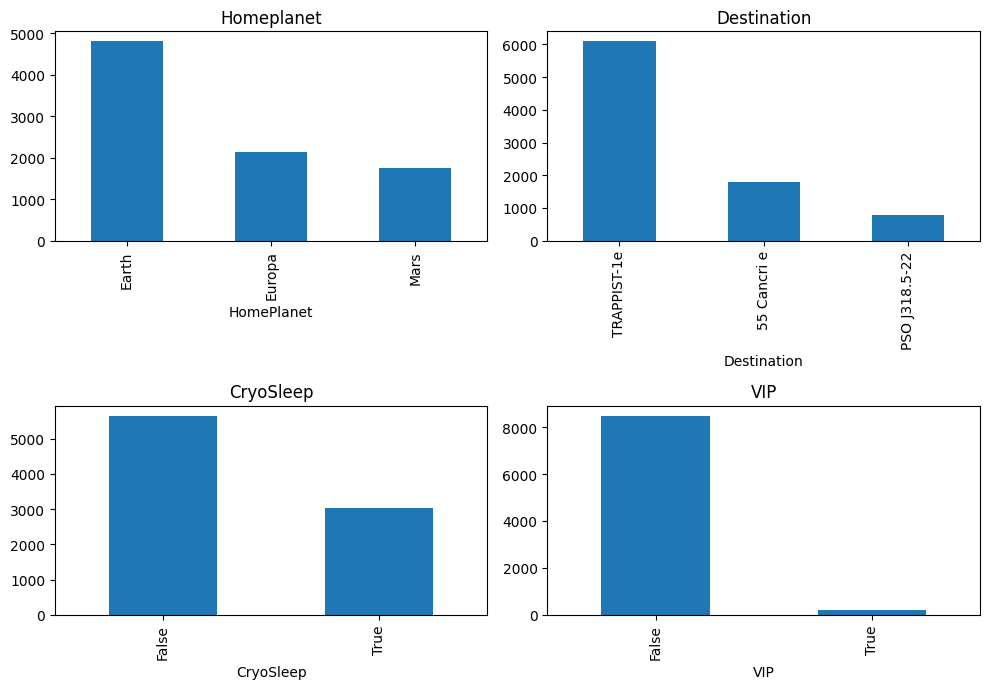

In [599]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
df["HomePlanet"].value_counts().plot(kind="bar", title="Homeplanet")
plt.subplot(2,2,2)
df["Destination"].value_counts().plot(kind="bar", title="Destination")
plt.subplot(2,2,3)
df["CryoSleep"].value_counts().plot(kind="bar", title="CryoSleep")
plt.subplot(2,2,4)
df["VIP"].value_counts().plot(kind="bar", title="VIP")
plt.tight_layout()

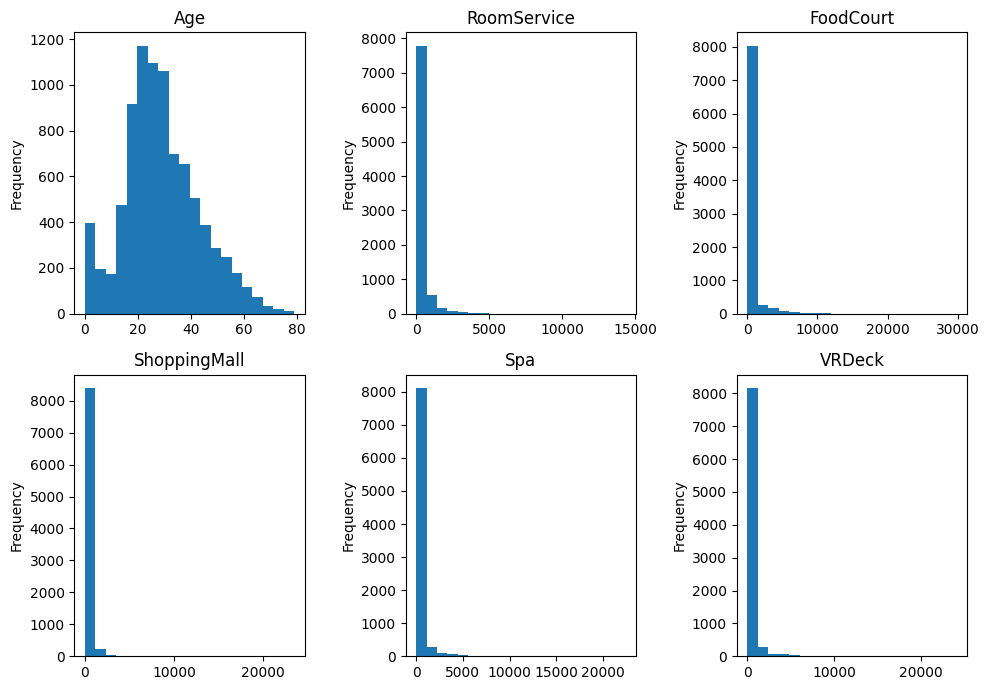

In [600]:
plt.figure(figsize=(10, 7))
for i, num_col in enumerate(numerical_variables):
    plt.subplot(2, 3, i+1)
    df[num_col].plot(kind="hist", bins=20)
    plt.title(num_col)
plt.tight_layout()

### Feature Engineering

1. Build 2 features out of the "Cabin" column, deck and port
2. Build a feature called group the pass-n-gerid variable

In [601]:
# Construyendo las características 'Deck' y 'Port' a partir de la columna 'Cabin'
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')

# Mapeo de valores categóricos a valores numéricos
deck_mapping = {'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7}
port_mapping = {'P': 0, 'S': 1}

# Aplicar el mapeo y reemplazar NaN con un valor por defecto (-1)
df['Deck'] = df['Deck'].map(deck_mapping).fillna(-1).astype(int)
df['Port'] = df['Port'].map(port_mapping).fillna(-1).astype(int)

# Eliminando la columna original 'Cabin'
df.drop(['Cabin'], axis=1, inplace=True)

# Mostrando las primeras filas del DataFrame
df.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [602]:
print(df["PassengerId"][0:10])

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
5    0005_01
6    0006_01
7    0006_02
8    0007_01
9    0008_01
Name: PassengerId, dtype: object


There are passengers that seem to have a subId, so we can suppose they were family related. Then, we can research how many they were, if they shared cabin, destination and more.

In [603]:
df["FamilyId"] = df["PassengerId"].str.split("_").str[0] # obtain family id xxxx
df["FamilySize"] = df.groupby("FamilyId")["FamilyId"].transform("count") # family size
df["IsFamily"] = (df["FamilySize"] > 1).astype(int) 

df["SameHomePlanet"] = df.groupby("FamilyId")["HomePlanet"].transform(lambda x: x.nunique() == 1).astype(int)
df["SameDestination"] = df.groupby("FamilyId")["Destination"].transform(lambda x: x.nunique() == 1).astype(int)
df["SameDeckAsFamily"] = df.groupby("FamilyId")["Deck"].transform(lambda x: x.nunique() == 1).astype(int)


In [604]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,Deck,Port,FamilyId,FamilySize,IsFamily,SameHomePlanet,SameDestination,SameDeckAsFamily
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,Maham Ofracculy,False,0,0,0001,1,0,1,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,Juanna Vines,True,1,1,0002,1,0,1,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,Altark Susent,False,2,1,0003,2,1,1,1,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,Solam Susent,False,2,1,0003,2,1,1,1,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,Willy Santantines,True,1,1,0004,1,0,1,1,1


In [605]:
research = ["SameDeckAsFamily", "SameHomePlanet", "SameDestination"]

for r in research:
    print(df[r].unique())
    print("---")

[1 0]
---
[1 0]
---
[1 0]
---


In [606]:
# we should transform isTransported into 0/1

df["Transported"] = df["Transported"].apply(lambda x: 1 if x == True else 0)
df["CryoSleep"] = df["CryoSleep"].apply(lambda x: 1 if x == True else 0)
df["VIP"] = df["VIP"].apply(lambda x: 1 if x == True else 0)

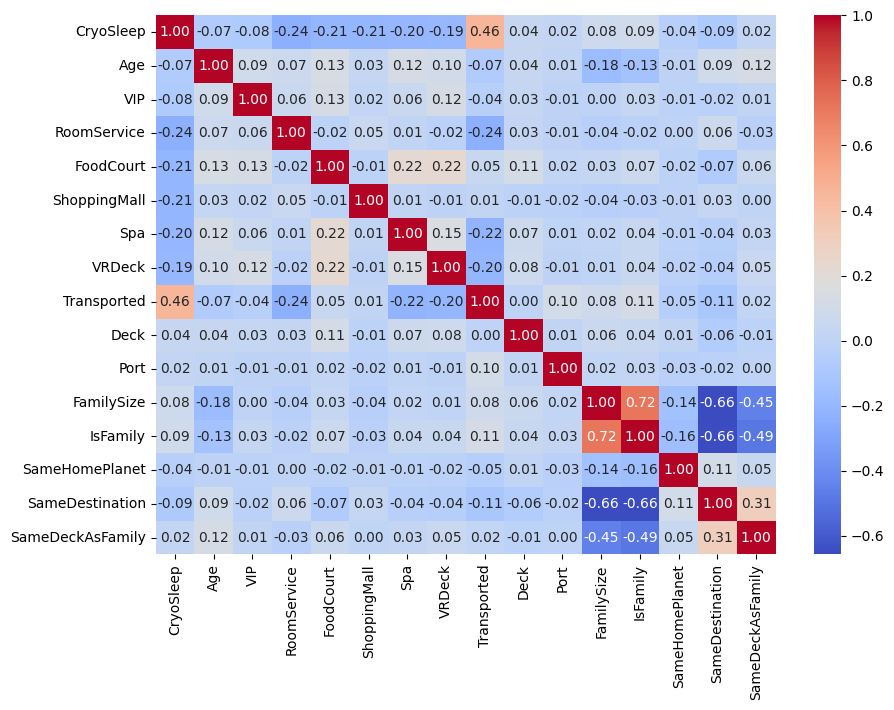

In [607]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

We start to see some things:
1. Exists a minor correlation for those columns which are commodities
2. There's a clear relation in the variables related with the family
3. If you got cryosleep, you will probably be transported

In [608]:
df['TotalExpenses'] = df.apply(lambda x: x['RoomService'] + x['FoodCourt'] + 
                                       x['ShoppingMall'] + x['Spa'] + x['VRDeck'], axis=1)

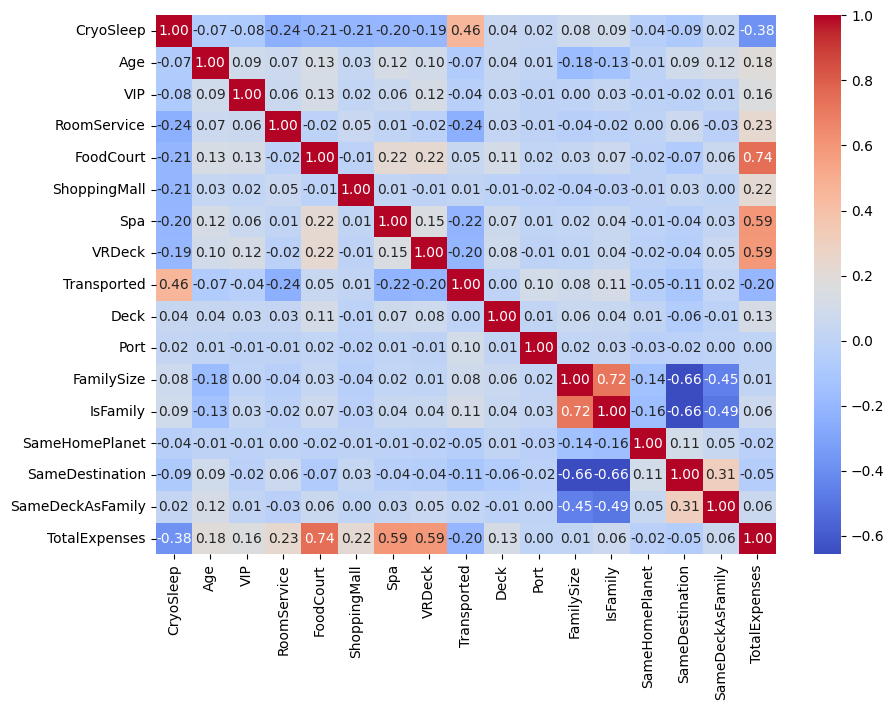

In [609]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [610]:
# variables are still correlated, we can remove some of them
df = df.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

In [611]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Deck,Port,FamilyId,FamilySize,IsFamily,SameHomePlanet,SameDestination,SameDeckAsFamily,TotalExpenses
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,Maham Ofracculy,0,0,0,0001,1,0,1,1,1,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,Juanna Vines,1,1,1,0002,1,0,1,1,1,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,Altark Susent,0,2,1,0003,2,1,1,1,1,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,Solam Susent,0,2,1,0003,2,1,1,1,1,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,Willy Santantines,1,1,1,0004,1,0,1,1,1,1091.0


In [612]:
# Now, we should just adjust the planets and the name(?
df["HomePlanet"].unique()

df = pd.get_dummies(df, columns=["HomePlanet", "Destination"], drop_first=False)

df["HomePlanet_Earth"] = df["HomePlanet_Earth"].apply(lambda x: 1 if x == True else 0)
df["HomePlanet_Europa"] = df["HomePlanet_Europa"].apply(lambda x: 1 if x == True else 0)
df["HomePlanet_Mars"] = df["HomePlanet_Mars"].apply(lambda x: 1 if x == True else 0)

df["Destination_55 Cancri e"] = df["Destination_55 Cancri e"].apply(lambda x: 1 if x == True else 0)
df["Destination_PSO J318.5-22"] = df["Destination_PSO J318.5-22"].apply(lambda x: 1 if x == True else 0)
df["Destination_TRAPPIST-1e"] = df["Destination_TRAPPIST-1e"].apply(lambda x: 1 if x == True else 0)
df.head()

,PassengerId,CryoSleep,Age,VIP,Name,Transported,Deck,Port,FamilyId,FamilySize,...,SameHomePlanet,SameDestination,SameDeckAsFamily,TotalExpenses,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,Maham Ofracculy,0,0,0,0001,1,...,1,1,1,0.0,0,1,0,0,0,1
1,0002_01,0,24.0,0,Juanna Vines,1,1,1,0002,1,...,1,1,1,736.0,1,0,0,0,0,1
2,0003_01,0,58.0,1,Altark Susent,0,2,1,0003,2,...,1,1,1,10383.0,0,1,0,0,0,1
3,0003_02,0,33.0,0,Solam Susent,0,2,1,0003,2,...,1,1,1,5176.0,0,1,0,0,0,1
4,0004_01,0,16.0,0,Willy Santantines,1,1,1,0004,1,...,1,1,1,1091.0,1,0,0,0,0,1


In [613]:
# Name is an useless variable now, as we don't have any interesting title we can extract
df = df.drop(columns=["Name"])
df.head()

,PassengerId,CryoSleep,Age,VIP,Transported,Deck,Port,FamilyId,FamilySize,IsFamily,SameHomePlanet,SameDestination,SameDeckAsFamily,TotalExpenses,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,0,0,0,0001,1,0,1,1,1,0.0,0,1,0,0,0,1
1,0002_01,0,24.0,0,1,1,1,0002,1,0,1,1,1,736.0,1,0,0,0,0,1
2,0003_01,0,58.0,1,0,2,1,0003,2,1,1,1,1,10383.0,0,1,0,0,0,1
3,0003_02,0,33.0,0,0,2,1,0003,2,1,1,1,1,5176.0,0,1,0,0,0,1
4,0004_01,0,16.0,0,1,1,1,0004,1,0,1,1,1,1091.0,1,0,0,0,0,1


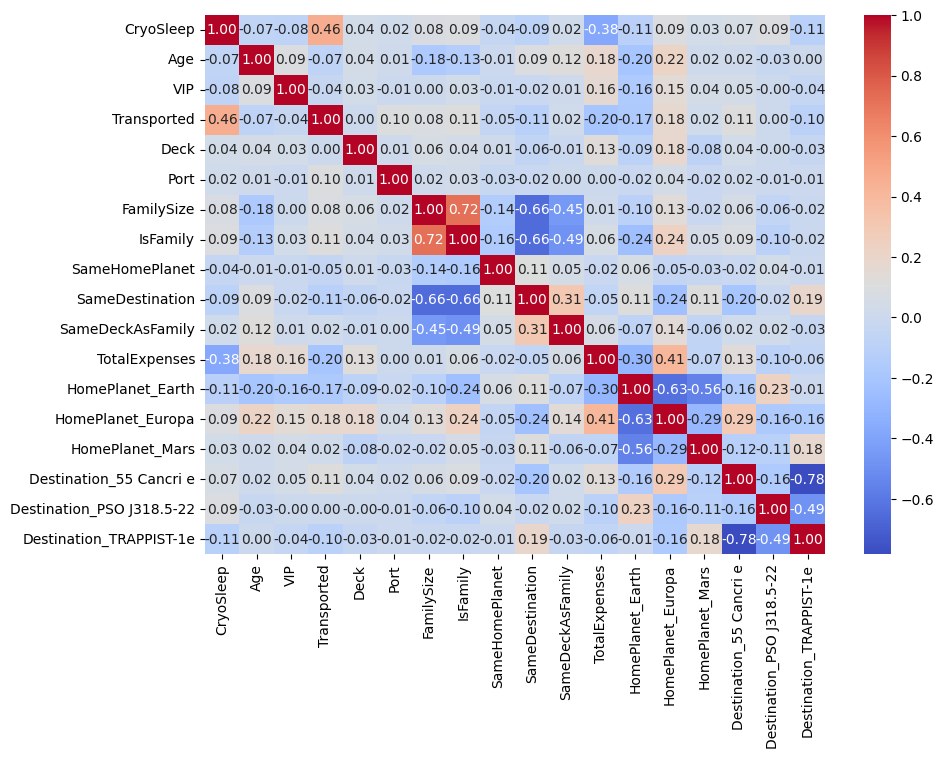

In [614]:
# One lest corr() check
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

I would say we are pretty much done. However, we know have to do the same to our test dataset in order to execute this.

In [615]:
categorical_variables = df_test.select_dtypes(include=["object"]).columns
numerical_variables = df_test.select_dtypes(include=["float64"]).columns

for col in categorical_variables:
    print(col)
print("---")
for col in numerical_variables:
    print(col)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
---
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [616]:
for col in df_test.columns:
    print(f"{col}, {df_test[col].isnull().sum()}")
for col in categorical_variables:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
for col in numerical_variables:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

PassengerId, 0
HomePlanet, 87
CryoSleep, 93
Cabin, 100
Destination, 92
Age, 91
VIP, 93
RoomService, 82
FoodCourt, 106
ShoppingMall, 98
Spa, 101
VRDeck, 80
Name, 94


/var/folders/vg/m8rbcw4d0flbg3s9lng0tc840000gp/T/ipykernel_12973/146836118.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[col] = df_test[col].fillna(df_test[col].mode()[0])


In [617]:
# Construyendo las características 'Deck' y 'Port' a partir de la columna 'Cabin'
df_test['Deck'] = df_test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_test['Port'] = df_test['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')

# Mapeo de valores categóricos a valores numéricos
deck_mapping = {'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7}
port_mapping = {'P': 0, 'S': 1}

# Aplicar el mapeo y reemplazar NaN con un valor por defecto (-1)
df_test['Deck'] = df_test['Deck'].map(deck_mapping).fillna(-1).astype(int)
df_test['Port'] = df_test['Port'].map(port_mapping).fillna(-1).astype(int)

# Eliminando la columna original 'Cabin'
df_test.drop(['Cabin'], axis=1, inplace=True)

# Mostrando las primeras filas del DataFrame
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Port
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,3,1
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,6,1
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,6,1
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1


In [618]:
df_test["FamilyId"] = df_test["PassengerId"].str.split("_").str[0] # obtain family id xxxx
df_test["FamilySize"] = df_test.groupby("FamilyId")["FamilyId"].transform("count") # family size
df_test["IsFamily"] = (df_test["FamilySize"] > 1).astype(int) 

df_test["SameHomePlanet"] = df_test.groupby("FamilyId")["HomePlanet"].transform(lambda x: x.nunique() == 1).astype(int)
df_test["SameDestination"] = df_test.groupby("FamilyId")["Destination"].transform(lambda x: x.nunique() == 1).astype(int)
df_test["SameDeckAsFamily"] = df_test.groupby("FamilyId")["Deck"].transform(lambda x: x.nunique() == 1).astype(int)


In [619]:
df_test['TotalExpenses'] = df_test.apply(lambda x: x['RoomService'] + x['FoodCourt'] + x['ShoppingMall'] + x['Spa'] + x['VRDeck'], axis=1)
df_test = df_test.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])


In [620]:
df_test = pd.get_dummies(df_test, columns=["HomePlanet", "Destination"], drop_first=False)

df_test["HomePlanet_Earth"] = df_test["HomePlanet_Earth"].apply(lambda x: 1 if x == True else 0)
df_test["HomePlanet_Europa"] = df_test["HomePlanet_Europa"].apply(lambda x: 1 if x == True else 0)
df_test["HomePlanet_Mars"] = df_test["HomePlanet_Mars"].apply(lambda x: 1 if x == True else 0)

df_test["Destination_55 Cancri e"] = df_test["Destination_55 Cancri e"].apply(lambda x: 1 if x == True else 0)
df_test["Destination_PSO J318.5-22"] = df_test["Destination_PSO J318.5-22"].apply(lambda x: 1 if x == True else 0)
df_test["Destination_TRAPPIST-1e"] = df_test["Destination_TRAPPIST-1e"].apply(lambda x: 1 if x == True else 0)

In [621]:
df_test = df_test.drop(columns=["Name"])

In [622]:
print(len(df.columns))
print(len(df_test.columns))

20
19


Now we can create our model

## Creating and executing our model

We are assuming that our data follows a non-linear relation. Why is that? Because our low-correlation values with respect to all the variables that were initially given in the .csv

Some models that are good for these types of data are:
1. Random Forest
2. XGBoost
3. Neural Networks

We will try to with the Random Forest and XGBoost models

### Random Forest Model

In [623]:
from sklearn.ensemble import RandomForestClassifier

In [624]:
y_train = df["Transported"]
df = df.drop(columns=["Transported"])

In [625]:
model = RandomForestClassifier(n_estimators=100)

In [626]:
model.fit(df, y_train)

RandomForestClassifier()

In [627]:
y_pred = model.predict(df_test)

In [628]:
y_pred

array([0, 0, 1, ..., 1, 1, 0], shape=(4277,))

In [640]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'], 
    'Transported': y_pred.astype(bool)
})

submission.to_csv('submission.csv', index=False)

In [641]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True


In [643]:
submission.to_csv("submission.csv", index=False)

In [642]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
